In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import PIL
import pathlib
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Paths

In [25]:
batch_size = 32
image_width = 224
image_height = 224
trainpath = 'train'
testpath = 'test'
valpath = 'valid'

### Laoding the images from the directory

In [3]:
train_ds = keras.preprocessing.image_dataset_from_directory(
    trainpath,
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 58388 files belonging to 400 classes.


In [4]:
val_ds = keras.preprocessing.image_dataset_from_directory(
    valpath,
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 2000 files belonging to 400 classes.


In [5]:
test_ds = keras.preprocessing.image_dataset_from_directory(
    testpath,
    seed=123,
    image_size=(image_height, image_width),
    batch_size=batch_size
)

Found 2000 files belonging to 400 classes.


In [6]:
class_names = train_ds.class_names
print(class_names) # data class name

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'AVADAVAT', 'AZURE JAY', 'AZURE TANAGER', 'AZURE TIT', 'BAIKAL TEAL', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BAND TAILED GUAN', 'BANDED BROADBILL', 'BANDED PITA', 'BANDED STILT', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWALLOW', 'BARRED PUFFBIRD', 'BARROWS GOLDENEYE', 'BAY-BREASTED WARBLER', 'BEARDED BARBET', 'BEARDED BELLBIR

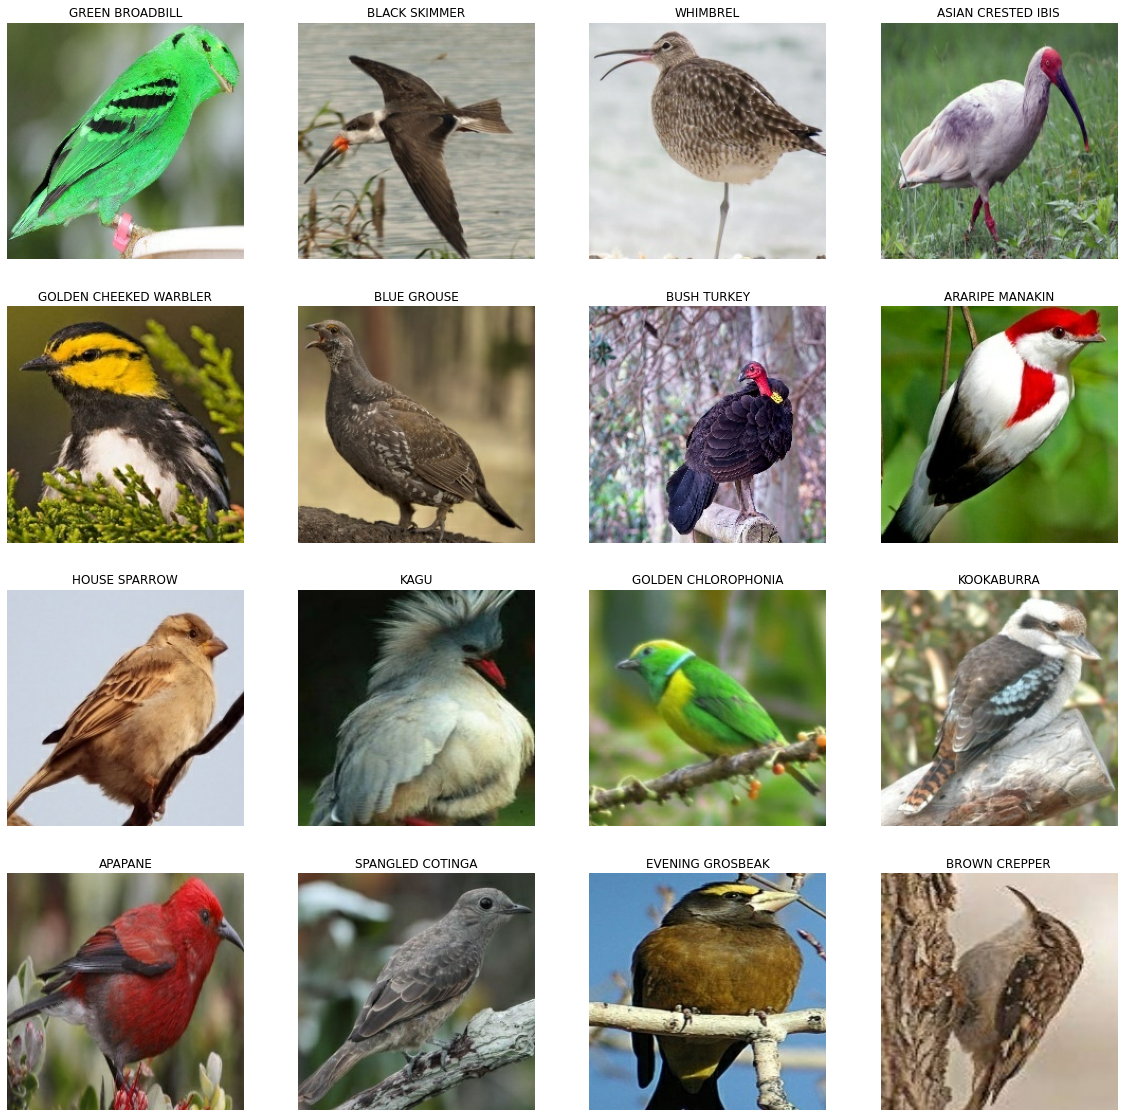

In [7]:
plt.figure(figsize=(20, 20))
for image, label in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [8]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
MobileNet_model = keras.applications.MobileNetV3Small(input_shape=(image_width, image_height, 3),
                                            classes=400,
                                            include_top=False,
                                            weights='imagenet')

In [9]:
MobileNet_model.trainable = False
MobileNet_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

 expanded_conv_1/depthwise/Batc  (None, 28, 28, 72)  288         ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 re_lu_4 (ReLU)                 (None, 28, 28, 72)   0           ['expanded_conv_1/depthwise/Batch
                                                                 Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, 28, 28, 24)  1728        ['re_lu_4[0][0]']                
 D)                                                                                               
                                                                                                  
 expanded_conv_1/project/BatchN  (None, 28, 28, 24)  96          ['expanded_conv_1/project[0][0]']
 orm (Batc

                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    2400        ['expanded_conv_3/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__oper

                                                                                                  
 expanded_conv_4/squeeze_excite  (None, 14, 14, 240)  0          ['multiply_4[0][0]',             
 /Mul (Multiply)                                                  'tf.math.multiply_7[0][0]']     
                                                                                                  
 expanded_conv_4/project (Conv2  (None, 14, 14, 40)  9600        ['expanded_conv_4/squeeze_excite/
 D)                                                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_4/project/BatchN  (None, 14, 14, 40)  160         ['expanded_conv_4/project[0][0]']
 orm (BatchNormalization)                                                                         
                                                                                                  
 expanded_

                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, 14, 14, 120)  4800       ['expanded_conv_5/Add[0][0]']    
 )                                                                                                
                                                                                                  
 expanded_conv_6/expand/BatchNo  (None, 14, 14, 120)  480        ['expanded_conv_6/expand[0][0]'] 
 rm (BatchNormalization)                                                                          
                                                                                                  
 tf.__operators__.add_11 (TFOpL  (None, 14, 14, 120)  0          ['expanded_conv_6/expand/BatchNor
 ambda)                                                          m[0][0]']                        
          

                                                                 m[0][0]',                        
                                                                  'tf.math.multiply_14[0][0]']    
                                                                                                  
 expanded_conv_7/depthwise (Dep  (None, 14, 14, 144)  3600       ['multiply_9[0][0]']             
 thwiseConv2D)                                                                                    
                                                                                                  
 expanded_conv_7/depthwise/Batc  (None, 14, 14, 144)  576        ['expanded_conv_7/depthwise[0][0]
 hNorm (BatchNormalization)                                      ']                               
                                                                                                  
 tf.__operators__.add_15 (TFOpL  (None, 14, 14, 144)  0          ['expanded_conv_7/depthwise/Batch
 ambda)   

 tf.__operators__.add_18 (TFOpL  (None, 7, 7, 288)   0           ['expanded_conv_8/depthwise/Batch
 ambda)                                                          Norm[0][0]']                     
                                                                                                  
 re_lu_23 (ReLU)                (None, 7, 7, 288)    0           ['tf.__operators__.add_18[0][0]']
                                                                                                  
 tf.math.multiply_18 (TFOpLambd  (None, 7, 7, 288)   0           ['re_lu_23[0][0]']               
 a)                                                                                               
                                                                                                  
 multiply_12 (Multiply)         (None, 7, 7, 288)    0           ['expanded_conv_8/depthwise/Batch
                                                                 Norm[0][0]',                     
          

 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 144)   0           ['expanded_conv_9/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_conv_9/squeeze_excite  (None, 1, 1, 576)   83520       ['expanded_conv_9/squeeze_excite/
 /Conv_1 (Conv2D)                                                Relu[0][0]']                     
                                                                                                  
 tf.__operators__.add_22 (TFOpL  (None, 1, 1, 576)   0           ['expanded_conv_9/squeeze_excite/
 ambda)                                                          Conv_1[0][0]']                   
          

                                                                                                  
 tf.math.multiply_25 (TFOpLambd  (None, 1, 1, 576)   0           ['re_lu_30[0][0]']               
 a)                                                                                               
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 7, 7, 576)   0           ['multiply_16[0][0]',            
 e/Mul (Multiply)                                                 'tf.math.multiply_25[0][0]']    
                                                                                                  
 expanded_conv_10/project (Conv  (None, 7, 7, 96)    55296       ['expanded_conv_10/squeeze_excite
 2D)                                                             /Mul[0][0]']                     
                                                                                                  
 expanded_

In [11]:
num_classes = len(class_names)

inputs = keras.Input(shape=(image_width, image_height, 3))
x = keras.applications.mobilenet_v3.preprocess_input(inputs)
x = MobileNet_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
model1 = keras.Model(inputs, outputs)

In [12]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 576)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 400)               230800    
                                                                 
Total params: 1,169,920
Trainable params: 230,800
Non-trainab

In [13]:
initial_epochs = 20

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

MobileNet = model1.fit(train_ds, 
          validation_data=val_ds,
          epochs=initial_epochs,
          callbacks=[early_stop])

Epoch 1/20
1825/1825 [==============================] - 82s 41ms/step - loss: 1.7461 - accuracy: 0.6706 - val_loss: 0.4827 - val_accuracy: 0.9160
Epoch 2/20
1825/1825 [==============================] - 73s 40ms/step - loss: 0.6036 - accuracy: 0.8656 - val_loss: 0.2881 - val_accuracy: 0.9410
Epoch 3/20
1825/1825 [==============================] - 73s 40ms/step - loss: 0.4422 - accuracy: 0.8947 - val_loss: 0.2314 - val_accuracy: 0.9480
Epoch 4/20
1825/1825 [==============================] - 75s 41ms/step - loss: 0.3591 - accuracy: 0.9109 - val_loss: 0.2015 - val_accuracy: 0.9490
Epoch 5/20
1825/1825 [==============================] - 74s 41ms/step - loss: 0.3096 - accuracy: 0.9208 - val_loss: 0.1858 - val_accuracy: 0.9540
Epoch 6/20
1825/1825 [==============================] - 74s 40ms/step - loss: 0.2681 - accuracy: 0.9300 - val_loss: 0.1703 - val_accuracy: 0.9560
Epoch 7/20
1825/1825 [==============================] - 72s 39ms/step - loss: 0.2443 - accuracy: 0.9348 - val_loss: 0.1707 -

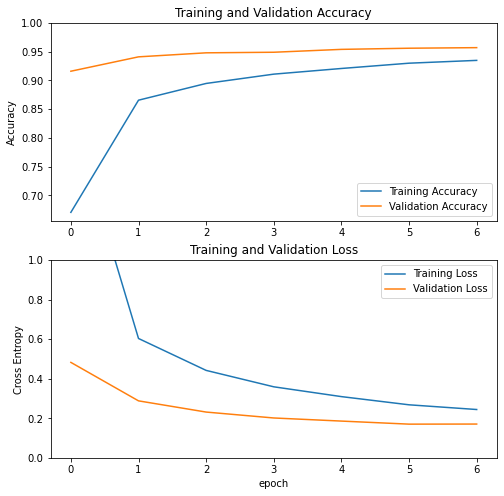

In [14]:
initial_epochs = len(MobileNet.history['accuracy'])
acc = MobileNet.history['accuracy']
val_acc = MobileNet.history['val_accuracy']

loss = MobileNet.history['loss']
val_loss = MobileNet.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [15]:
test_ds_unbatch = keras.utils.image_dataset_from_directory(
    testpath,
    seed=None,
    shuffle=False,
    image_size=(image_height, image_width),
    batch_size=image_height,
)
# images = list(test_ds_unbatch.map(lambda x, y: x))
# labels = list(test_ds_unbatch.map(lambda x, y: y))
y_test = np.concatenate([y for x, y in test_ds_unbatch], axis=0)
prediction = model1.predict(test_ds_unbatch)
pred = np.argmax(prediction,axis=1) # returns the index of the maximum value. Which denotes the image label
print(pred)
accuracy_score(pred,y_test)

Found 2000 files belonging to 400 classes.
9/9 [==============================] - 5s 347ms/step
[  0   0   0 ... 399 399 399]


0.9665

In [16]:
np.concatenate((y_test.reshape((len(y_test),1)),pred.reshape((len(pred),1))), axis=1)[55:70]

array([[ 11,  11],
       [ 11,  11],
       [ 11,  11],
       [ 11, 258],
       [ 11,  11],
       [ 12,  12],
       [ 12,  12],
       [ 12,  12],
       [ 12,  12],
       [ 12,  12],
       [ 13,  13],
       [ 13,  13],
       [ 13,  13],
       [ 13,  13],
       [ 13,  13]], dtype=int64)

## Single image prediction

In [106]:
## From web
# image_url = "https://cdn.download.ams.birds.cornell.edu/api/v1/asset/262407521/1200"
# bird_path = tf.keras.utils.get_file("1200", origin=image_url)

## from device
bird_path = 'images to test/evening grosbeak.jpg'

img = tf.keras.utils.load_img(bird_path, target_size=(image_height, image_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model1.predict(img_array)

print(
    "This image most likely belongs to {} species with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions[0])], 100*np.max(predictions[0]))
)


1/1 [==============================] - 0s 20ms/step
This image most likely belongs to EVENING GROSBEAK species with a 91.43 percent confidence.


## VGG 19

In [17]:
VGG19_model = keras.applications.vgg19.VGG19(input_shape=(image_width, image_height, 3),
                                            classes=400,
                                            include_top=False,
                                            weights='imagenet')

In [18]:
VGG19_model.trainable = False
VGG19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
inputs = keras.Input(shape=(image_width, image_height, 3))
x = keras.applications.vgg19.preprocess_input(inputs)
x = VGG19_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(num_classes, activation='softmax')(x)
model2 = keras.Model(inputs, outputs)

In [20]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 512)               0   

#### Training the model

In [21]:
initial_epochs = 10

early_stop = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)
vgg19 = model2.fit(train_ds, 
          validation_data=val_ds,
          epochs=initial_epochs,
          callbacks=[early_stop])

Epoch 1/10
1825/1825 [==============================] - 640s 348ms/step - loss: 3.8074 - accuracy: 0.4952 - val_loss: 0.7055 - val_accuracy: 0.8435
Epoch 2/10
1825/1825 [==============================] - 633s 347ms/step - loss: 1.2256 - accuracy: 0.7647 - val_loss: 0.5493 - val_accuracy: 0.8925
Epoch 3/10
1825/1825 [==============================] - 632s 346ms/step - loss: 0.9954 - accuracy: 0.8094 - val_loss: 0.5066 - val_accuracy: 0.9030
Epoch 4/10
1825/1825 [==============================] - 631s 346ms/step - loss: 0.8842 - accuracy: 0.8327 - val_loss: 0.5093 - val_accuracy: 0.9175


## Single image prediction

In [66]:
## From web
# image_url = "https://cdn.download.ams.birds.cornell.edu/api/v1/asset/262407521/1200"
# bird_path = tf.keras.utils.get_file("1200", origin=image_url)

## from device
bird_path = 'images to test/wood duck.jpg'

img = tf.keras.utils.load_img(bird_path, target_size=(image_height, image_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} species with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100*np.max(score))
)

1/1 [==============================] - 1s 1s/step
This image most likely belongs to WOOD DUCK species with a 0.68 percent confidence.
